### Linear regression
Model: f_wb = x*w + b

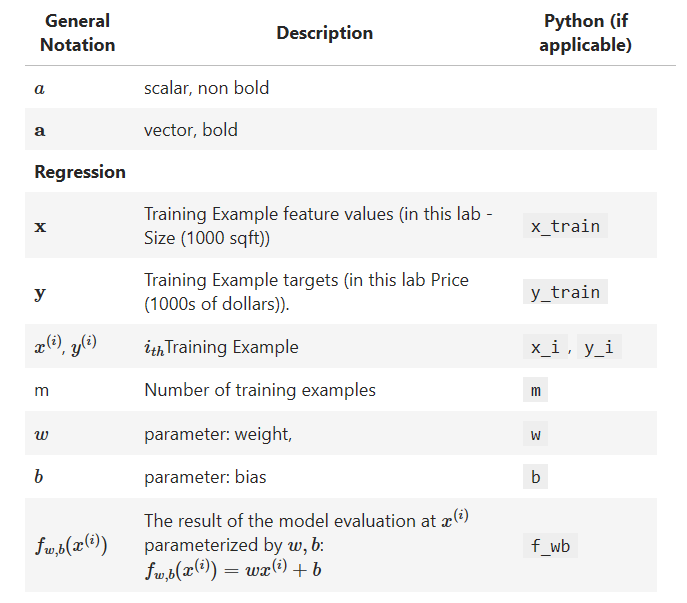

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')

### Problem statement
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for $ 300,000 and a house with 2000 square feet sold for dollars 500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

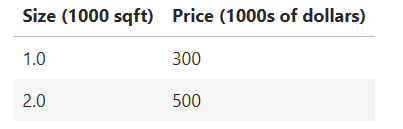


In [3]:
x_train = np.array([1.,2.])
y_train = np.array([300.0,500.0])

In [8]:
# m is the number of training examples
m = len(x_train)
print(f"m is {m}")

m is 2


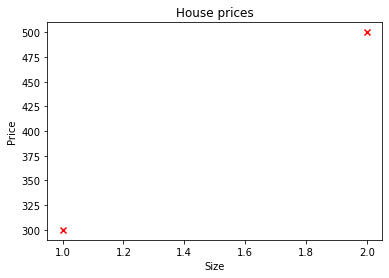

In [10]:
# Plot the data
plt.title('House prices')
plt.ylabel('Price')
plt.xlabel('Size')
plt.scatter(x_train,y_train, marker = 'x', c = 'r')

Model: f_wb = x*w + b

Intitial w = 100, b =100

In [15]:
w = 100
b =100

In [18]:
def compute_model_output(x,w,b):
    m = len(x)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i] + b
    return f_wb

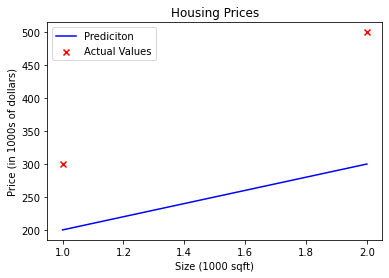

In [19]:
# Temperory prediction
tmp_f_wb = compute_model_output(x_train,w,b)
plt.plot(x_train,tmp_f_wb,c='b',label = 'Prediciton')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

To minimize the error, we have to minimize the cost fucntion, in this case it is root mean sqaure error

## Cost Funtion
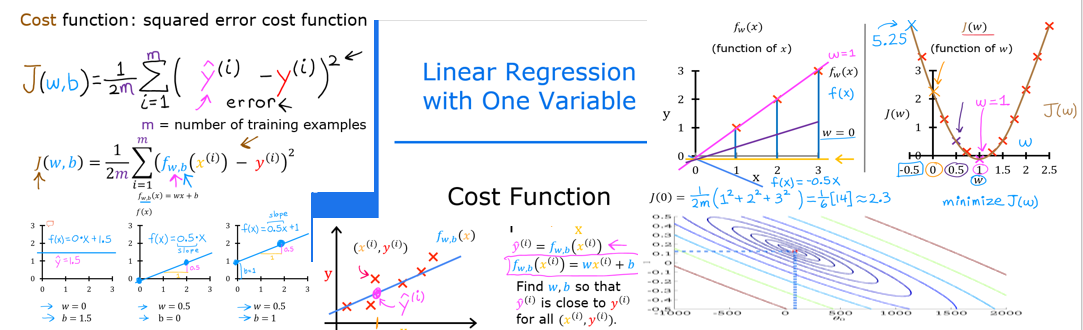

## Computing Cost 
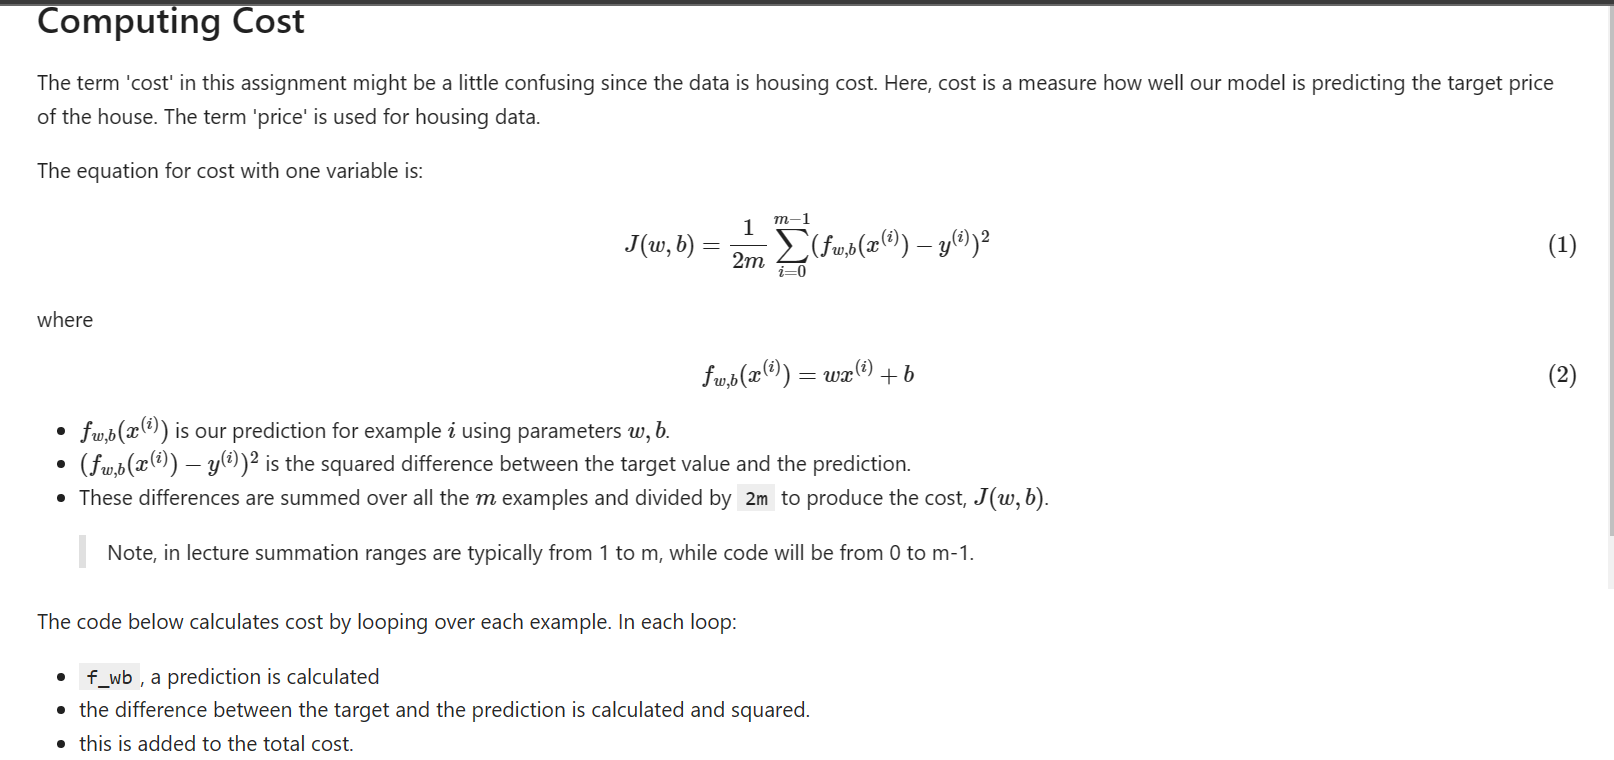

In [94]:
def compute_cost(x,y,w,b):
    m = len(x)
    cost_sum = 0
    for i in range(m):
        f_wb = w*x[i] + b
        J = (f_wb - y[i])**2
        cost_sum += J
    total_cost = (1/(2*m))*cost_sum
    return total_cost

In [87]:
# cost for the above example with w=100, b=100
print(compute_cost(x_train,y_train,w,b))

#cost with w = 200, b = 2
w1 = 200
b1=2
print(compute_cost(x_train,y_train,w1,b1))

12500
4802


## Gradient descent
To find the minimum cost function, we use an alogorithm called Gradient Descent
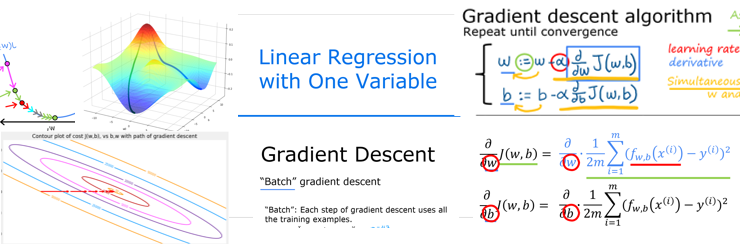
So we need to find the best values for w and b so that cost function is minimum

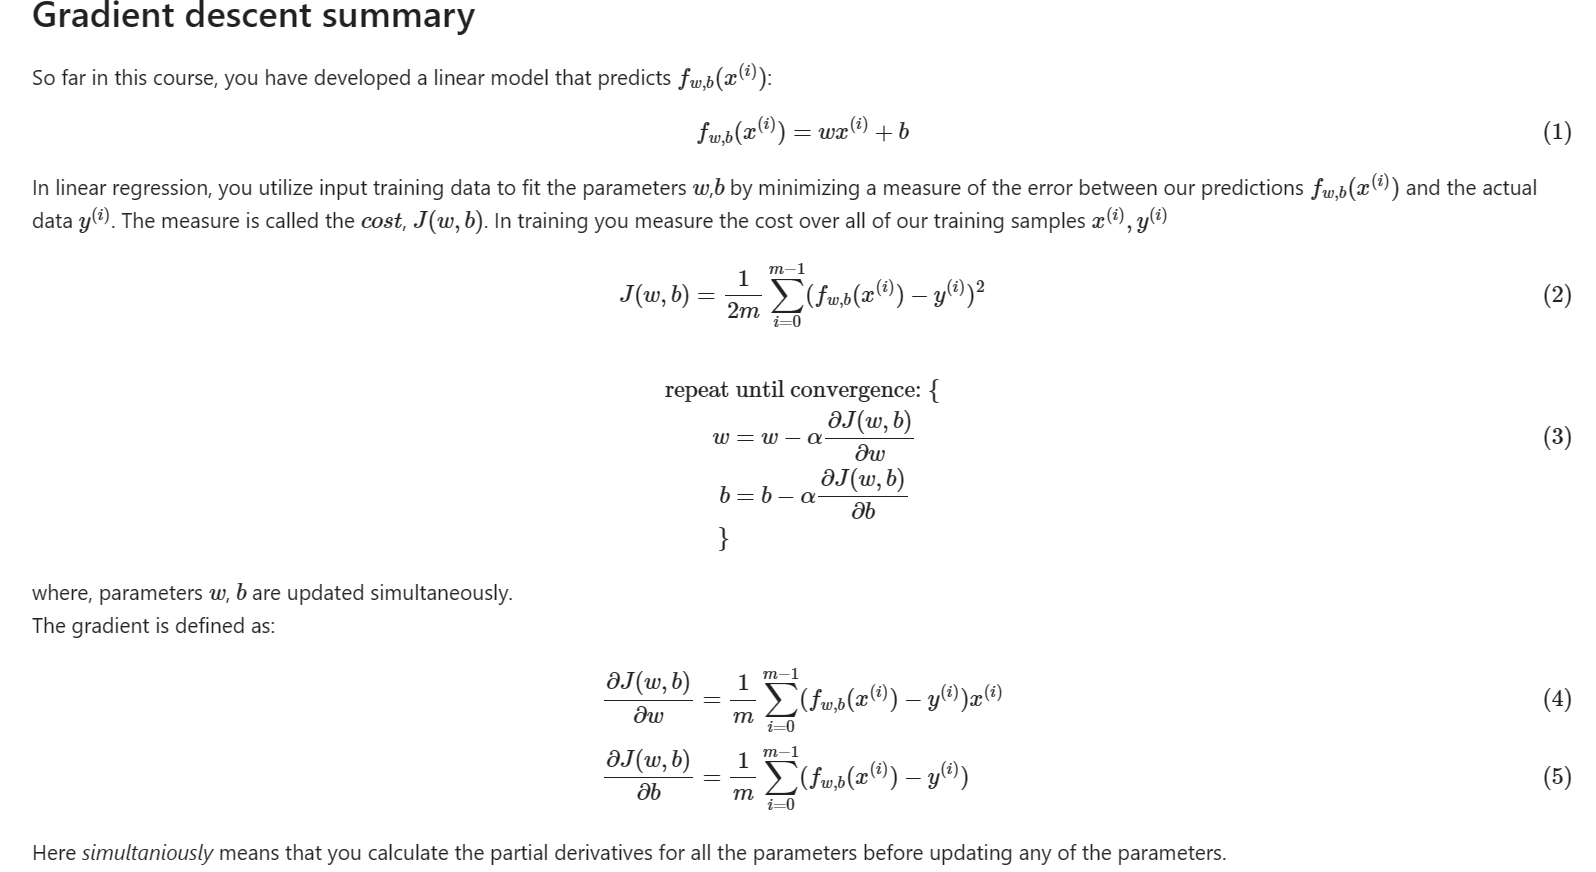

### Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.

-> "compute_gradient" implementing equation (4) and (5) above

-> compute_cost implementing equation (2) above (code from previous lab)

-> gradient_descent, utilizing compute_gradient and compute_cost

Conventions:

The naming of python variables containing partial derivatives follows this pattern,
 
 will be dj_db.
w.r.t is With Respect To, as in partial derivative of J(wb)
 With Respect To b
.

In [25]:
import math, copy

In [97]:
def compute_gradient(x,y,w,b):
    dj_dw = 0
    dj_db = 0
    m = len(x)
    for i in range(m):
        f_wb = x[i]*w + b
        dj_dw += (f_wb - y[i])*x[i]
        
        dj_db += f_wb - y[i] 
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [28]:
# compute_cost is already a defined fucn

In [95]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history
    
    
        
    

In [45]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


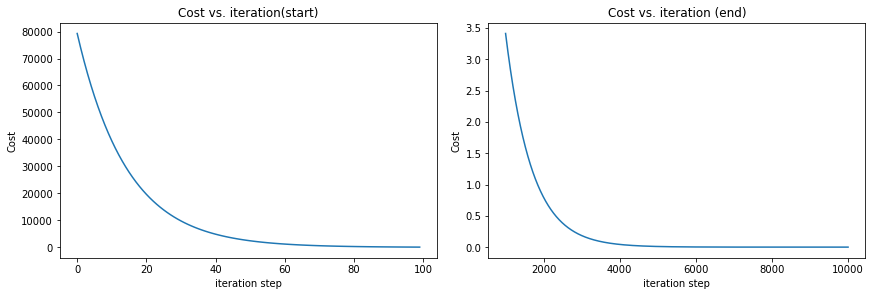

In [46]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [49]:
#Prediction
# for size as 1.2, price = ?
print(f"1200 sqft house prediction {w_final*1.0 + b_final:0.1f} thousan dollars")

1200 sqft house prediction 300.0 thousan dollars


### End of prac

#### Prediction on a data set

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('real_estate_price_size.csv')

In [65]:
df.tail()

,price,size
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29
99,274922.856,705.29


In [54]:
df.size

200

In [63]:
X = df['size'][:-2]
y = df['price'][:-2]

In [66]:
X.size,y.size

(98, 98)

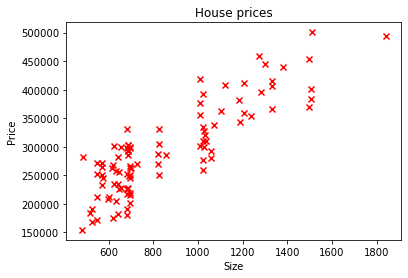

In [69]:
# Plot the data
plt.title('House prices')
plt.ylabel('Price')
plt.xlabel('Size')
plt.scatter(X,y, marker = 'x', c = 'r')

In [71]:
print(w,b)

100 100


In [77]:
X1 = round(X)
y1 = round(y)
print(X1[:5],y1[:5])

0     643.0
1     656.0
2     487.0
3    1505.0
4    1275.0
Name: size, dtype: float64 0    234314.0
1    228582.0
2    281626.0
3    401256.0
4    458674.0
Name: price, dtype: float64


In [78]:
compute_cost(X,y,w,b)

22939770112.76079

In [79]:
compute_gradient(X,y,w,b)

(-188597233.8488629, -207389.7439999999)

In [126]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 10**-6
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.73e+09  dj_dw: -2.710e+08, dj_db: -2.932e+05   w:  2.710e+02, b: 2.93152e-01
Iteration  100: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 1.45927e+00
Iteration  200: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 2.56462e+00
Iteration  300: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 3.66996e+00
Iteration  400: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 4.77529e+00
Iteration  500: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 5.88061e+00
Iteration  600: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 6.98592e+00
Iteration  700: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 8.09121e+00
Iteration  800: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 9.19649e+00
Iteration  900: Cost 1.33e+09  dj_dw:  1.151e+01, dj_db: -1.105e+04   w:  3.293e+02, b: 1.03018e+01


As seen we best values for w and b are  ( 10.0026, 10.0000)

In [127]:
W = 329.3031
B = 11.3960
#Prediction on new values:
P1 = df['size'][98]*W + B
P2 = df['size'][99]*W + B

print(f'Predicted{P1,P2} vs. actual')
print({df['price'][98] ,df['price'][99]})

Predicted(213495.30269899996, 232265.57939899998) vs. actual
{225145.248, 274922.856}


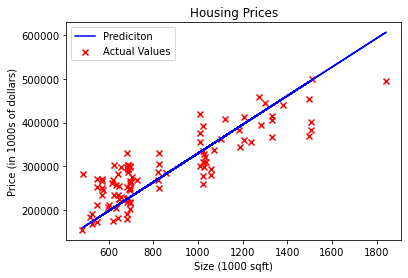

In [128]:
#  
tmp_f_wb = compute_model_output(X,W,B)
plt.plot(X,tmp_f_wb,c='b',label = 'Prediciton')
plt.scatter(df['size'], df['price'], marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Fine tune your alpha so that you get the best fit